## 実習の準備

### Chapter 4.1 ライブラリのimport

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras import regularizers

# データの分割
from sklearn.model_selection import train_test_split

# 画像データのデータセットを取得するためにsklearnを使用
from sklearn import datasets

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

### Chapter 4.2 データの読み込み

In [2]:
# MNISTのデータセットを読み込む
digits = datasets.load_digits()

In [3]:
# 中身の確認
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [20]:
print("digits['target']の個数  =",len(digits['target']))
print("digits['target']の30個分=",digits['target'][:30])

digits['target']の個数  = 1797
digits['target']の30個分= [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


### Chapter 4.3 データの確認
データを読み込んだら内容を確認していきましょう。

In [4]:
# digitsの構成
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# 説明の表示
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

画像データの数は1797個、ピクセル数は64個（縦8ピクセル x 横8ピクセル）、ピクセルの値は16段階の整数値であることがわかります。  
▼下記引用
```
:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
```

In [6]:
# data:説明変数
digits['data'].shape

(1797, 64)

説明変数は画像のピクセルデータです。モノクロ画像なので1ピクセルは1つの値で構成されています。  
画像データは2次元配列ではなく、64ピクセルすべてが1列に並んだ1次元配列となっています。

In [7]:
"""1枚だけ画像データの中身を確認してみましょう。その際、画像データを 8x8 の形状へ非破壊的にreshapeしてから表示します。"""
# dataから1枚の画像データを取得
temp = digits['data'][0]

# 8x8にreshape
temp = temp.reshape(8,8)
temp

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

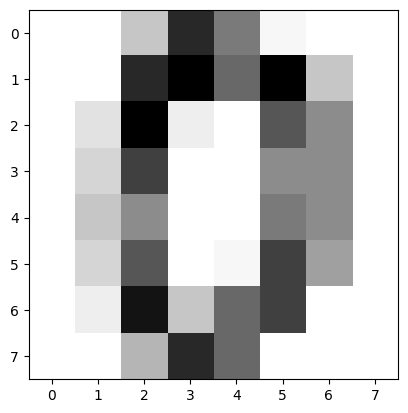

In [8]:
"""
画像データを可視化してみましょう。
Matplotlibの imshow を使うとリストを画像として出力できます。
今回はカラーマップを Greys にしています。これは、数値が大きいほどピクセルが黒く表示されるようになっています。
"""
# 画像化して表示
# カラーマップは 'Greys' を使用
#（数値が大きいほどピクセルは黒く表示される）
plt.imshow(temp, cmap='Greys', vmin=0, vmax=15)

In [12]:
"""
※上記の画像は0に見える
おそらく、この画像は数値の0であるようです。対応する目的変数で確認してみましょう。
"""
# 対応する目的変数を確認
# digits['target'][0] # np.int64(0)と表示され、カリキュラム通りならない
# カリキュラム通りに"0"を出力するため、print
print(digits['target'][0])

0


### Chapter 4.4 データの前処理
データセットから目的変数と説明変数を取り出します。目的変数は数値、説明変数は画像データとなります。

In [21]:
# 目的変数（Y）：target、説明変数（X）：data
Y = digits['target']
X = digits['data']

In [22]:
# 形状の確認
print(Y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [23]:
# 中身を確認
print(Y)

[0 1 2 ... 8 9 8]


In [24]:
"""
多クラス分類問題ですので、目的変数をカテゴリー変数に展開します。
これまではPandasの get_dummies を使用してきましたが、Kerasにも to_categorical という同じような機能の関数が存在します。
今回はこちらを使用してみましょう。
"""
# カテゴリー変数への展開
Y = tf.keras.utils.to_categorical(Y)

In [25]:
# 形状の確認
print(Y.shape)
print(X.shape)

(1797, 10)
(1797, 64)


In [26]:
# Yのデータを1個確認
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
# Yのデータを10個確認
Y[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Dense（全結合）層のみを使ったモデルの構築と学習

ここでは、Lesson10の多クラス分類モデルと同様の方法でモデルを作成します。

### Chapter 5.1 モデルの構築

In [38]:
"""
はじめに、生のデータをそのまま学習させてみます。
すなわち画像サイズ 8 x 8 ピクセルのデータを 横に並べた64個の説明変数 をそのまま使用します。
"""
# 説明変数の例
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [40]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [41]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 64)
Y_valid= (378, 10) , X_valid= (378, 64)
Y_test= (540, 10) , X_test= (540, 64)


In [44]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(64,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# モデルの構造を表示
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,482 (5.79 KB)

 Trainable params: 1,482 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

### Chapter 5.2 学習の実施
モデルの構築が終わったら、学習を行いましょう。

In [46]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1217 - loss: 3.0413 - val_accuracy: 0.2196 - val_loss: 2.1485
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2685 - loss: 2.0969 - val_accuracy: 0.4127 - val_loss: 1.7498
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3743 - loss: 1.7624 - val_accuracy: 0.5132 - val_loss: 1.4350
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4972 - loss: 1.4658 - val_accuracy: 0.6111 - val_loss: 1.1711
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6280 - loss: 1.1797 - val_accuracy: 0.7169 - val_loss: 0.9453
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7235 - loss: 0.9252 - val_accuracy: 0.7698 - val_loss: 0.8031
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7691 - loss: 0.7481 - val_accuracy: 0.8016 - val_loss: 0.6681
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.6069 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

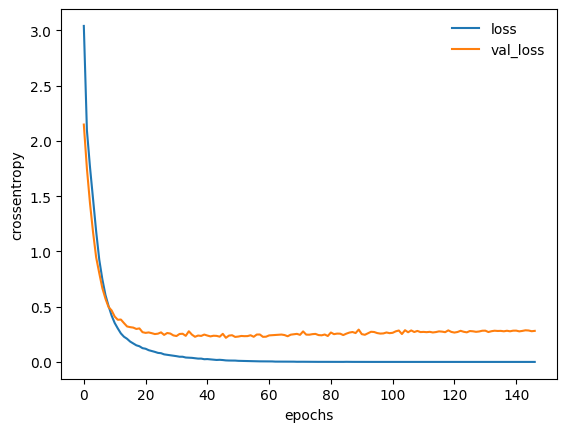

In [47]:
"""グラフで学習過程を確認してみましょう。かなり早い段階で過学習が発生してしまっていることがわかります。"""
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### Chapter 5.3 テストデータによる評価
最後に、テストデータを使って、汎化性能を評価します。予測結果は np.argmax() でカテゴリー変数からクラス番号に復元します。

In [51]:
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


In [52]:
# テストデータのカテゴリー変数への復元
Y_test_ = np.argmax(Y_test, axis=1)

In [53]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.91      0.96      0.93        52
           2       1.00      0.98      0.99        53
           3       0.93      0.96      0.95        54
           4       1.00      1.00      1.00        48
           5       0.98      0.95      0.96        57
           6       0.98      0.98      0.98        60
           7       1.00      0.98      0.99        53
           8       0.93      0.92      0.93        61
           9       0.96      0.93      0.95        57

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.96      0.96       540



## CNN（畳み込み）層を使ったモデルの構築と学習
Kerasには全結合層（Dense）だけでなく、データの種類に応じたいくつかの層のクラスが用意されています。ここではCNN（畳み込み）層について説明と実習を行います。

### Chapter 6.1 CNNの概要
画像データで良く使われるのが `CNN`（Convolutional Neural Network、畳み込みニューラルネットワーク）です。

畳み込みの層は画像データの 本来の形状 を保ったままモデルにデータを入力できます。たとえば今回のデータセットは画像サイズが 8x8 のグレースケールなので以下のように指定できます。
```
input_shape=(8, 8, 1,)
```

別の例として、画像サイズが 28x28、カラーの場合は以下のようになります。「3」はRGB（赤緑青）3つのチャネルを表します。
```
input_shape=(28, 28, 3,)
```


CNNの出力値は、入力データに `フィルター` を適用したものです。フィルターは `3x3` などの`大きさの行列`です。フィルターの値は、最初の1枚目はランダムですが、モデルの学習状況に応じて、新しく作られるフィルターの値が自動的に調整されていきます。

CNNの流れのイメージとしては、以下のようになります。
1. 新しいフィルターを自動で作成します
2. そのフィルターを、入力データの画像の左上に配置します
3. フィルターと、入力データの画像との間で演算を行います。演算は要素ごとの積の和を取るのが一般的です
4. 演算の結果を出力値の左上1ピクセルに貼り付けます
5. フィルターを右に1ピクセルずらします。このずらす幅を `ストライド`(stride)と呼びます
6. 入力データの画像の右下へ行くまで、3～5を繰り返します  

入力データの画像にフィルターを適用すると、ストライド幅が1の場合、出力値の大きさは `入力データの画像の縦-2、横-2` になってしまいます。出力値の大きさを入力データの画像と同じ大きさにする操作を `パディング (padding)` と呼びます。

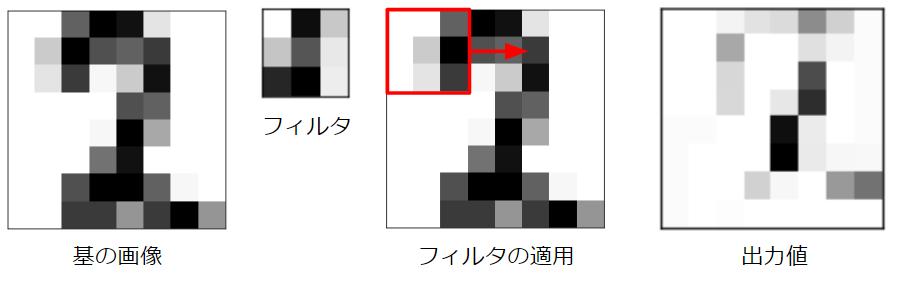  
フィルターの数がCNNのパラメータの数です。フィルターの数を増やすことで、1つの入力データから複数の出力値を得ることができます。

以下は32枚のフィルターを適用したイメージです。  
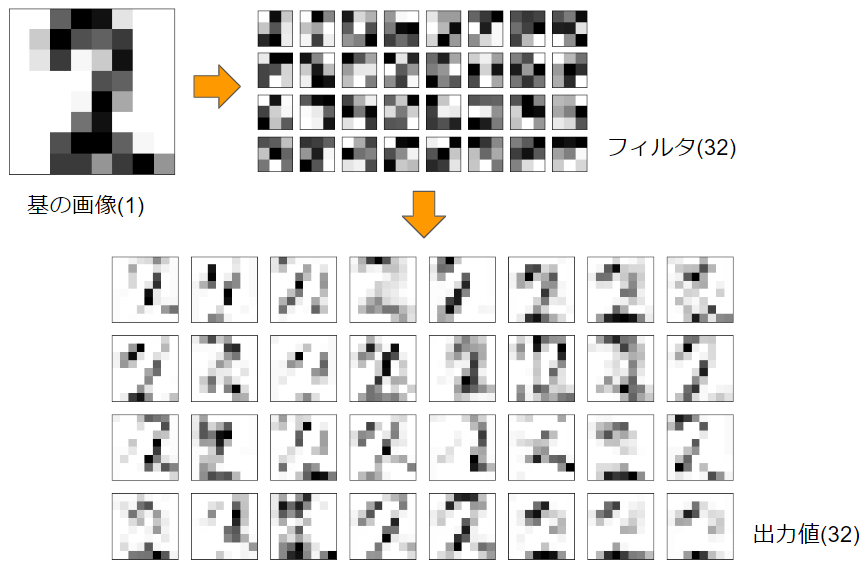  

CNNの強みは、人間の視覚と同じような学習が行えることです。
- 移動不変 ：  
上記のイメージからもわかるように、出力値は入力データの画像をずらしたような結果になっています。これは、元の「2」という形は保ったまま、位置を変えた情報も学習できていることを指します。人間も数字の形で判断しているのであって位置は問いません。このように、位置によらず判断が行えることを `移動不変` と呼びます  
- 抽象化 ：  
フィルターを適用することで、単純に入力データの画像からは得られないような特徴を抽出できます。具体的にはエッジや輪郭などの特徴です。これは後述するプーリング層と組み合わせることで、より効果を発揮します。
- 重み共有 ：  
重みが共有されることでパラメータ数を減らせ、過学習が起こりづらくなります。

### Chapter 6.2 モデルの構築
それではCNN層を使ってモデルを構築し、全結合（Dense）層を使った場合から精度が上がるかを見てみましょう。  
まずは説明変数を本来の形状、すなわち 8x8 の画像の形状にします。


In [54]:
# 8x8の画像の形状にreshape
X2 = X.reshape(len(X), 8, 8, 1)

In [ ]:
"""reshapeできたかを確認します。"""
# 形状を確認
print(X2.shape)

(1797, 8, 8, 1)


In [56]:
# データの分割。X2を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [57]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 8, 8, 1)
Y_valid= (378, 10) , X_valid= (378, 8, 8, 1)
Y_test= (540, 10) , X_test= (540, 8, 8, 1)


In [76]:
# 向学のため、中身を確認
print("Y_train=", Y_train[0])
print("---X_train[0]--- 画像データ8*8ピクセル、Y_trainは2を示唆")
print(X_train[1])

Y_train= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
---X_train[0]--- 画像データ8*8ピクセル、Y_trainは2を示唆
[[[ 0.]
  [ 0.]
  [ 5.]
  [14.]
  [10.]
  [ 7.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [16.]
  [16.]
  [16.]
  [16.]
  [ 3.]
  [ 0.]]

 [[ 0.]
  [ 3.]
  [16.]
  [10.]
  [ 2.]
  [16.]
  [ 7.]
  [ 0.]]

 [[ 0.]
  [ 7.]
  [16.]
  [ 3.]
  [ 0.]
  [12.]
  [ 8.]
  [ 0.]]

 [[ 0.]
  [ 8.]
  [16.]
  [ 1.]
  [ 0.]
  [12.]
  [ 8.]
  [ 0.]]

 [[ 0.]
  [ 7.]
  [16.]
  [ 5.]
  [ 2.]
  [16.]
  [ 4.]
  [ 0.]]

 [[ 0.]
  [ 2.]
  [16.]
  [15.]
  [14.]
  [13.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 7.]
  [15.]
  [13.]
  [ 2.]
  [ 0.]
  [ 0.]]]


----X_train[0]を画像化----


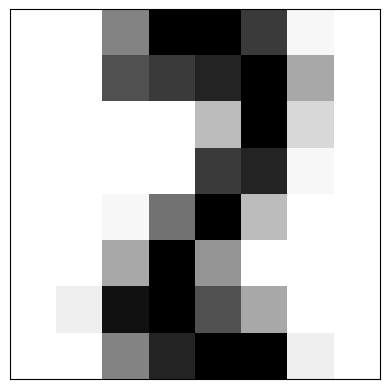

In [75]:
# 向学のため X_train[0]を可視化(画像化)
print("----X_train[0]を画像化----")
plt.imshow(X_train[0].reshape(8, 8), cmap='Greys')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [63]:
"""
畳み込み層は Conv2D を使用します。
また、最終的に出力層から出力されるデータは1次元の10分類であるため、
Conv2Dから次の隠れ層へデータを渡すために、多次元の入力を1次元に変換する Flatten 層も利用します。

Conv2Dを入力層に使用したモデルは以下のようになります。
"""
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(8, 8, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1, activation="relu"),
    tf.keras.layers.Flatten(),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

入力層以外は先ほどの全結合層と同様です。Conv2D特有のパラメータは以下のとおりです。

- 第一引数：フィルターの数。今回は32
- `kernel_size` ：フィルターの大きさ。今回は `3x3` のフィルターとなる
- `padding` ：パディングの有無を指定。「same」は基の画像と同じサイズになるように調整。パディングしない場合は「valid」を指定
- `strides` ：ずらす幅。今回は1

In [64]:
# モデルの構造を表示
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,274 (129.98 KB)

 Trainable params: 33,274 (129.98 KB)

 Non-trainable params: 0 (0.00 B)

### Chapter 6.3 学習の実施
モデルの構築が終わったら学習を行いましょう。

In [65]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4369 - loss: 1.7634 - val_accuracy: 0.5714 - val_loss: 1.2756
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6177 - loss: 1.0856 - val_accuracy: 0.6587 - val_loss: 0.9167
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.8278 - val_accuracy: 0.7302 - val_loss: 0.7302
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7520 - loss: 0.5909 - val_accuracy: 0.7381 - val_loss: 0.6071
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.4431 - val_accuracy: 0.7989 - val_loss: 0.5487
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8783 - loss: 0.3271 - val_accuracy: 0.8386 - val_loss: 0.4690
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2327 - val_accuracy: 0.8995 - val_loss: 0.3133
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9613 - loss: 0.1483 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

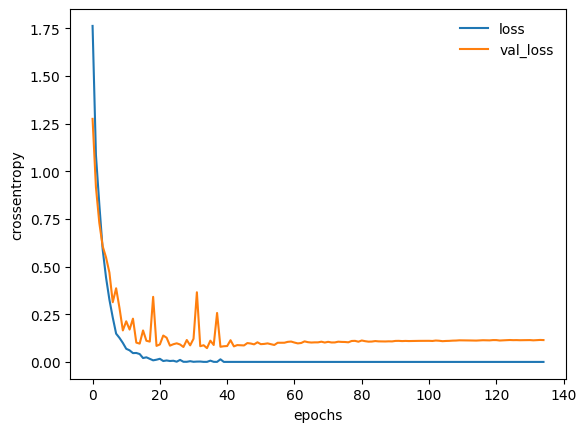

In [67]:
"""グラフで学習過程を確認してみましょう。全結合層よりは改善されているのが確認できます。"""
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### Chapter 6.4 テストデータによる評価
最後にテストデータによる汎化性能を評価します。

In [68]:
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [69]:
# テストデータのカテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [70]:
# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.92      0.94      0.93        52
           2       1.00      0.96      0.98        53
           3       0.96      0.98      0.97        54
           4       0.98      1.00      0.99        48
           5       0.98      0.93      0.95        57
           6       0.97      0.98      0.98        60
           7       1.00      0.98      0.99        53
           8       0.95      0.89      0.92        61
           9       0.90      0.98      0.94        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



```
# Dense(全結合の値)
    accuracy                           0.96       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.96      0.96       540
```

カリキュラムでは0.95が0.97にアップしたが、randam_state=0では0.96->0.96と変化なし

### Chapter 6.5　畳み込み層の学習の詳細
畳み込み層の学習ではどのようなことが行われているのでしょうか。フィルターや出力値を可視化して確認してみましょう。まずは入力データを表示してみます。

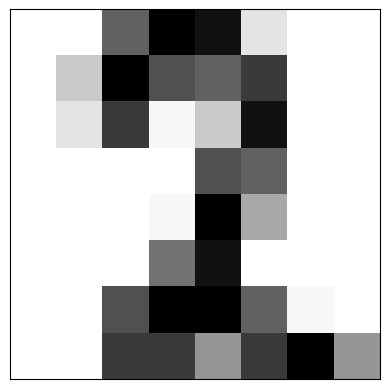

In [72]:
# テストデータの0番目を可視化
plt.imshow(X_test[0].reshape(8, 8), cmap='Greys')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [77]:
"""数字の2のようですね。対応するラベルの確認"""
# 対応するラベルを確認
np.argmax(Y_test[0])

np.int64(2)

In [78]:
"""モデルのパラメータは get_weights() 関数で取得できます。"""
# モデルの重み（パラメータ）の取得
w = model.get_weights()

In [ ]:
"""0番目の層がConv2D層です。"""
# 0番目の層（Conv2D)を取得
w0 = w[0]

In [ ]:
"""形状を確認してみます。3x3のグレースケールのフィルターが32枚保持されているのを確認できます。"""
# 形状の確認
w0.shape

(3, 3, 1, 32)

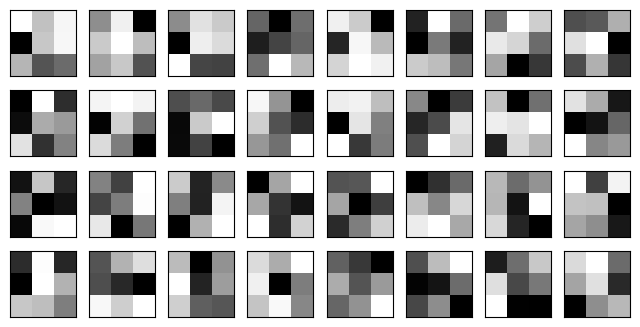

In [81]:
"""それではフィルターを可視化してみましょう。以下のコードを実行すると、3x3の大きさのフィルターが32枚分、表示されます。"""
# Conv2D層のフィルターの可視化

# 4行8列にグラフを分割
fig, ax = plt.subplots(4, 8, figsize=(8, 4))

for i in range(4):
    for j in range(8):
        # zは左上から数えたグラフの描画位置
        z = i * 8 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(w0[:, :, :, z].reshape(3, 3), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

次に、先ほどの入力データ（数字の2）にフィルターを適用した演算結果、すなわちConv2D層の出力値を可視化してみます。

まずは、先ほど作成したモデルの各層の出力部分のみを取得します。出力部分は output で取得できます。

In [82]:
# 各層の出力を取得
layer_outputs = [layer.output for layer in model.layers]

In [83]:
"""これの最初の要素がConv2D層の出力部分です。"""
# 最初の層の情報を表示
layer_outputs[0]

<KerasTensor shape=(None, 8, 8, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>

In [84]:
"""また、モデル全体の入力情報は model.inputs[0] で取得できます。"""
# モデル全体の入力部分の情報を表示
model.inputs[0]

<KerasTensor shape=(None, 8, 8, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_16>

In [85]:
"""
ここで、新しくモデルを作ります。
その際、モデルの入力部分に model.inputs[0]、出力部分として layer_outputs[0] を指定したうえで、モデルを作成します。
"""
# 入力:モデルの入力、出力:Conv2Dの出力
activation_model = tf.keras.Model(inputs=model.inputs[0], outputs=layer_outputs[0])
activation_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 8, 8, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 32)       │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
"""先ほど作成した activation_model のモデルに対して predict を行うとConv2D層の出力が得られます。"""
# 予測:Conv2Dの結果が出力される
activations = activation_model.predict(X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


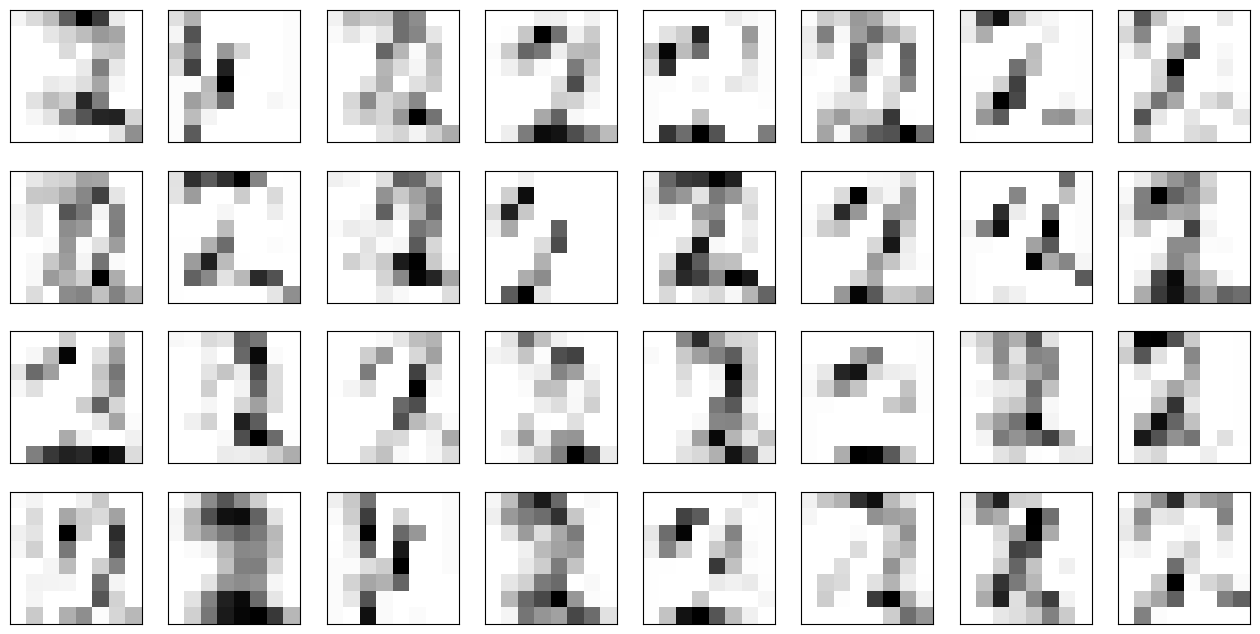

In [87]:
# Conv2D層の結果を可視化
# 4行8列にグラフを分割
fig, ax = plt.subplots(4, 8, figsize=(16, 8))

for i in range(4):
    for j in range(8):
        # zは左上から数えたグラフの描画位置
        z = i * 8 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(activations[0, :, :, z], cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

入力データとフィルターとの演算により、多くの出力が得られていることがわかります。

## Chapter 7 モデルの性能を上げよう
Lesson6で取り上げたシャローラーニングにおけるチューニングは、説明変数の選択とモデルのパラメータの調整が主でした。ディープラーニングにおいても一般的によく使われる手法が存在します。ここでその手法を学びましょう。モデルの性能を上げよう

### Chapter 7.1 チューニング後のモデル
ここで行っているチューニングのポイントは以下となります。詳細は後述します。
- 適切なパラメータの設定
- プーリング層
- ドロップアウト層
- ユニットの繰り返し
- 正則化

In [95]:
"""チューニング後のモデルの完成形が、下記のコードです。"""
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(8, 8, 1)),

    # 最初の畳み込みブロック
      # ここでは入力データの形状 8, 8, 1 に合わせて入力層のフィルター数「64」を決めています。もっと増やすことも可能です。
      # その他のパラメータの値（フィルター、パディング、プーリングサイズなど）は一般的に利用できるものを設定しています。
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 2番目の畳み込みブロック
      # 前のユニットでプーリングを行い、画像サイズが半分になったため、フィルター数を倍の128に増やしています。
      # これは情報量を落とさないために良く使われるテクニックです。
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 全結合層への準備
      # 最終的な出力層に向けて1次元に変換しています。ここで正則化を取り入れ、過度なパラメータ値を抑制しています。
      # 出力層の手前で大きめ（0.5）のドロップアウトを入れるのも良く使われるテクニックです。
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)), # 正則化
    tf.keras.layers.Dropout(0.5),

    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
# モデルの構造を表示
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,978 (421.79 KB)

 Trainable params: 107,978 (421.79 KB)

 Non-trainable params: 0 (0.00 B)

モデルはざっくりと分けて3つのユニットで構成されています。
- 1つ目のユニット
  - Conv2D
  - MaxPooling2D
  - Dropout
- 2つ目のユニット
  - Conv2D
  - MaxPooling2D
  - Dropout
- 3つ目のユニット
  - Flatten
  - Dense
  - Dropout
  - Dense

### Chapter 7.2 チューニングのポイント
ディープラーニングのチューニングのポイントは、過学習を防ぎつつ、最適なエポック数・パラメータを見つけ出すという点です。
- 適切なパラメータの設定：性能向上、過学習防止
- プーリング層：性能向上（抽象化、移動不変）
- ドロップアウト層：過学習防止
- ユニットの繰り返し：性能向上
- 正則化：過学習防止

#### 適切なパラメータの設定
パラメータ数は、主に層の入力形状と出力形状で決まります。たとえば入力形状が「8x8x1=64」の場合、出力形状が「50000」だと、明らかに過剰です。パラメータの数が多すぎると、過度に学習データの特徴を捉えてしまい、過学習に陥りやすくなります。逆に出力形状が「8」では、パラメータの数が小さすぎて充分学習できない可能性が高くなります。

入力層や隠れ層の場合、出力形状は入力形状と同等～10倍ぐらいの範囲にするのが一般的です。出力層の場合は、分類モデルであれば分類の数、回帰モデルであれば1となります。しかし、その直前の層のパラメータ数が多い場合は、間に層を入れ、急激なパラメータの減少を避けることも良く行われます。  

・完成形のサンプルコードより抜粋
```
    # 最初の畳み込みブロック
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
```

#### プーリング層
学習データを抽象化し、新たな特徴を得るのが プーリング層 です。プーリング層は、指定された大きさの領域を演算により圧縮します。これにより、たとえば画像データであれば輪郭や直線などの特徴を抽出できます。演算の方法としては、領域内の最大値を取る MAXプーリング（最大プーリング）、平均値を取る 平均プーリング などがあります。一般的に使われるのはMAXプーリングです。

以下の場合、 2x2 の領域を 1x1 に圧縮します。
```
完成形のサンプルコードより抜粋
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
```

#### ドロップアウト層
過学習を防止するのがドロップアウト層です。ドロップアウトは、指定された割合でランダムに、出力を0にします。これにより各ニューロンの独立性が高まり学習の強度が増すと言われています。ドロップアウト層は `Dropout` を使用します。

ドロップアウトの数値は、層の前半では0.25(25%)、後半は0.5(50%)を指定することが一般的です。
```
完成形のサンプルコードより抜粋
    tf.keras.layers.Dropout(0.25),
```

#### 正則化
Lesson6で紹介した `正則化` はディープラーニングにおいても有効です。
- L1正則化：余計な説明変数を削除するようパラメータが調整されます
- L2正則化：パラメータが大きくなるのを防ぎ過学習を抑制します
正則化は `kernel_regularizer` で指定します。

完成形のサンプルコードより抜粋
```
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)), # 正則化
```

### Chapter 7.4 学習の実施、モデルの評価
モデルの内容が確認できたら、学習を行いましょう。

In [97]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1797 - loss: 2.5406 - val_accuracy: 0.5503 - val_loss: 1.9841
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3447 - loss: 1.9128 - val_accuracy: 0.7804 - val_loss: 1.1632
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6030 - loss: 1.2894 - val_accuracy: 0.9127 - val_loss: 0.5859
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7440 - loss: 0.9336 - val_accuracy: 0.9048 - val_loss: 0.4804
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8146 - loss: 0.6726 - val_accuracy: 0.9524 - val_loss: 0.2833
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8521 - loss: 0.5500 - val_accuracy: 0.9524 - val_loss: 0.2604
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8726 - loss: 0.4882 - val_accuracy: 0.9656 - val_loss: 0.1992
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9033 - loss: 0.3772 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

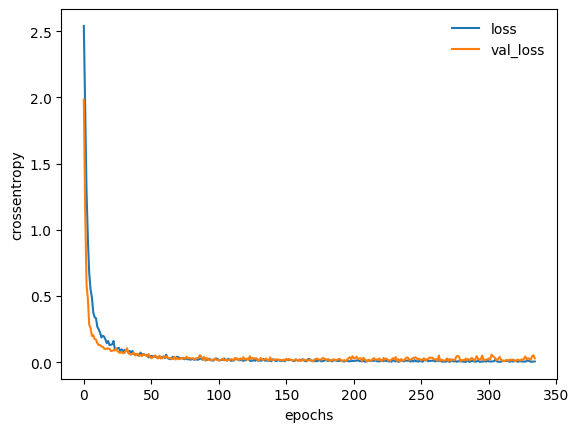

In [98]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

Epoch 247: early stopping や　Epoch 123: early stopping　は、表が乱高下するだけのものになった
Epoch 335: early stopping　は、カリキュラム通りの表となった。

In [99]:
"""最後にカテゴリー変数を復元して結果を評価してみます。"""
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [100]:
# テストデータのカテゴリー変数への復元
Y_test_ = np.argmax(Y_test, axis=1)

In [101]:
# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       1.00      0.98      0.99        57
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        53
           8       1.00      1.00      1.00        61
           9       0.98      1.00      0.99        57

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



かなり性能の良いモデルを得ること(実験ではaccuracy 1.00)ができました。  
層を深くしたりフィルターの数を増やすとさらにモデルの性能を向上させることができます。  
もちろんモデルを複雑にすればするほど学習時間も増えます。いろいろと試してみましょう。

## 補足

### モデルの保存と読み込み

In [54]:
# モデルの保存（Keras形式）
model.save('./my_model.keras')

In [55]:
# モデルの読み込み（Keras形式）
model2 = tf.keras.models.load_model('./my_model.keras')

In [56]:
# 読み込んだモデルによる予測
Y_pred = np.argmax(model2.predict(X_test), axis=1)

# モデルの評価
print(classification_report(Y_test_, Y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        48
           5       1.00      0.96      0.98        57
           6       0.98      1.00      0.99        60
           7       0.96      1.00      0.98        53
           8       1.00      0.98      0.99        61
           9       0.98      1.00      0.99        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### 実際のデータによる予測

In [57]:
# 必要なモジュールの追加読み込み
from PIL import Image

In [58]:
# 画像データの読み込み
image = Image.open('./img2.png')

# グレースケールに変換
image = image.convert('L')

# 表示
image

In [59]:
# numpy配列に変換
image_data = np.asarray(image, dtype=np.float64)
image_data

array([[255., 255.,  94.,   0.,   0., 255., 255., 255.],
       [255., 202.,   0.,  87., 104.,  16., 255., 255.],
       [255., 234.,   4., 255., 239.,   0., 255., 255.],
       [255., 255., 255., 255.,  48.,  87., 255., 255.],
       [255., 255., 255., 255.,   0., 181., 255., 255.],
       [255., 255., 255.,  99.,   0., 255., 255., 255.],
       [255., 255.,  49.,   0.,   0.,  82., 255., 255.],
       [255., 255.,  31.,  56., 186.,  46.,   0., 153.]])

In [60]:
# ネガポジ反転
image_data = 255 - image_data

# 16階調に変更
image_data = np.round(image_data/255*15)

# reshape
image_data = image_data.reshape(1, 8, 8, 1)

In [61]:
# 予測
Y_pred = np.argmax(model2.predict(image_data), axis=1)

# 結果の表示
print(Y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[2]
